In [2]:
import numpy as np
import matplotlib.pyplot as plt
from math import asin,pi, sqrt
import matplotlib.patches as patches
import matplotlib
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,AutoMinorLocator, LogLocator)
from scipy.optimize import curve_fit
from plotUtilities import *


In [3]:
data_file_LF  = ['LF_M0.03_v0.15c_1.5d.dat', 'LF_M0.03_v0.15c_2.5d.dat', 'LF_M0.03_v0.15c_3.5d.dat', 'LF_M0.03_v0.15c_5.5d.dat']
data_file_LR  = ['LR_M0.03_v0.15c_1.5d.dat', 'LR_M0.03_v0.15c_2.5d.dat', 'LR_M0.03_v0.15c_3.5d.dat', 'LR_M0.03_v0.15c_5.5d.dat']

In [4]:
OPAC_LF    = []   # liste des opac pour tous les temps 
OPAC_LR    = []
EPOCH = [1.5, 2.5, 3.5, 5.5]
for (i,epoch) in enumerate(EPOCH):
    data_LF = data_file_LF[i]
    data_LR = data_file_LR[i]
    opac_LF = np.genfromtxt(fname=data_LF, skip_header=2, dtype='float', usecols=(5))
    opac_LR = np.genfromtxt(fname=data_LR, skip_header=2, dtype='float', usecols=(5))
    OPAC_LF.append(opac_LF)
    OPAC_LR.append(opac_LR)
WaveLength_brut = np.genfromtxt(fname=data_LF, skip_header=2, dtype='float', usecols=(0))



In [5]:

#########################################################################
###################### Retrait des points nuls dans opacité #############
#########################################################################




OPAC_LF_brut_T1 = list(OPAC_LF[0])
OPAC_LF_brut_T2 = list(OPAC_LF[1])
OPAC_LF_brut_T3 = list(OPAC_LF[2])
OPAC_LF_brut_T4 = list(OPAC_LF[3])
WaveLength_reprocessed_LF   = list(WaveLength_brut)
a = np.where(np.array(OPAC_LF_brut_T4) == 0)[0]
print((len(OPAC_LF_brut_T4)), len(a))


while len(a) !=0:
    index = a[0]
    print(index, len(a))
    OPAC_LF_brut_T4.pop(index)
    OPAC_LF_brut_T3.pop(index)
    OPAC_LF_brut_T2.pop(index)
    OPAC_LF_brut_T1.pop(index)
    WaveLength_reprocessed_LF.pop(index)
    a = np.where(np.array(OPAC_LF_brut_T4) == 0)[0]
print(len((OPAC_LF_brut_T4)), len(OPAC_LF_brut_T3), len(OPAC_LF_brut_T2), len(OPAC_LF_brut_T1))

b = np.where(np.array(OPAC_LF_brut_T3) == 0)[0]
print((len(OPAC_LF_brut_T3)), len(b))


while len(b) !=0:
    index = b[0]
    print(index, len(a))
    OPAC_LF_brut_T4.pop(index)
    OPAC_LF_brut_T3.pop(index)
    OPAC_LF_brut_T2.pop(index)
    OPAC_LF_brut_T1.pop(index)
    WaveLength_reprocessed_LF.pop(index)
    a = np.where(np.array(OPAC_LF_brut_T3) == 0)[0]
print(len((OPAC_LF_brut_T3)))


print(np.where(OPAC_LF_brut_T3==0))
    

2000 49
959 49
984 48
1542 47
1587 46
1651 45
1670 44
1688 43
1693 42
1720 41
1722 40
1724 39
1744 38
1758 37
1760 36
1761 35
1763 34
1780 33
1792 32
1800 31
1809 30
1812 29
1813 28
1819 27
1819 26
1822 25
1822 24
1838 23
1840 22
1853 21
1859 20
1859 19
1860 18
1876 17
1887 16
1889 15
1894 14
1904 13
1907 12
1909 11
1912 10
1914 9
1919 8
1919 7
1923 6
1924 5
1925 4
1933 3
1940 2
1951 1
1951 1951 1951 1951
1951 0
1951
(array([], dtype=int64),)


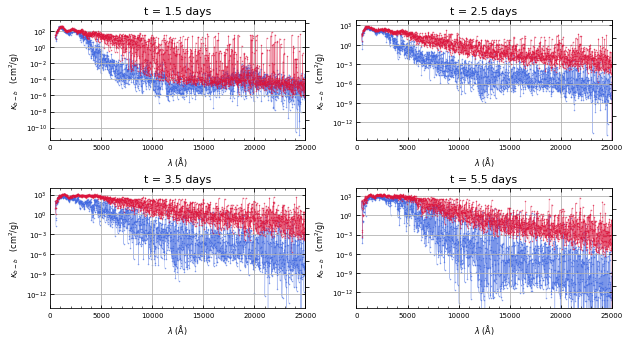

In [11]:
def model_LF(wave, alpha):
    kappaLF=[]
    for k in wave: 
        if k < lambda0_LF:
            kappaLF.append(kappa0_LF)
        else:
            kappaLF.append(kappa0_LF*(k/lambda0_LF)**(-alpha))
    return kappaLF

def modelAlpha_LF(epoch):
    alphaLF=[]
    for t in epoch:
        alphaLF.append(alpha0_LF*(t/t0)**gamma_LF)
    return alphaLF


def model_LR(wave, alpha):
    kappaLR=[]
    for k in wave:
        if k < lambda0_LR:
            kappaLR.append(kappa0_LR)
        else:
            kappaLR.append(kappa0_LR*(k/lambda0_LR)**(-alpha))
    return kappaLR

def modelAlpha_LR(epoch):
    alphaLR=[]
    for t in epoch:
        alphaLR.append(alpha0_LR*(t/t0)**gamma_LR)
    return alphaLR




t0 = 1.5
lambda0_LF = 10**(3.45)
lambda0_LR = 10**(3.65)
alpha0_LF = 10.78
alpha0_LR = 8.86

kappa0_LF = 1.2 * 10**3
kappa0_LR = 794
gamma_LF = -0.12
gamma_LR = -0.45

alphaLF = modelAlpha_LF(EPOCH)
alphaLR = modelAlpha_LR(EPOCH)

for (i,t) in enumerate(EPOCH): 
    numplot = 221 + i 
    alpha_LF = alphaLF[i]
    alpha_LR = alphaLR[i]
    LFmodel = model_LF(WaveLength_brut, alpha_LF)
    LRmodel = model_LR(WaveLength_brut, alpha_LR)

    Ax, LW = asManyPlots(numplot, [WaveLength_brut,WaveLength_brut], [OPAC_LF[i],OPAC_LR[i]],
                         color = ['royalblue', 'crimson'],linewidth= 0.3, alpha = [0.7,0.7],  
                       linestyle=['-', '-'], markerSize=0.5, plotFlag=[True, True],textsize= 8, tickSize = 7, xlabel= r'$\lambda$ $\rm{(\AA)}$', 
                         ylabel = r'$\kappa_{b-b} \quad (\rm{cm^2/g})}$', 
                         label = ['lanthanide free ejecta', 'lanthanide rich ejecta']
                                  )
  #  ax = plt.plot(WaveLength_brut, OPAC_LR[i], 'crimson', alpha = 0.7, linewidth= 0.3, linestyle='-', markersize=1.2, label = 'lanthanide rich ejecta')
  ##  ax = plt.plot(WaveLength_brut, LFmodel, 'cornflowerblue', alpha = 0.6)
   ## ax = plt.plot(WaveLength_brut, LRmodel, 'firebrick', alpha = 0.6)
    plt.yscale('log')
#matplotlib.axes.Axes.set_yscale('log', 'log')
    plt.xlim(0,25000)
    plt.title('t = {:2.1f} days'.format(EPOCH[i]), fontsize=11)

    Ax.xaxis.set_minor_locator(MultipleLocator(1000))
    secondax = Ax.secondary_yaxis('right')
    for axes in (Ax, secondax):
        axes.tick_params(top=True, labeltop=False, labelright=False)
        axes.tick_params(bottom = 'True', top='True', labelright=False) #secondax.set_scale('log')

#plt.ylim(10**(-4),10**3)
#plt.xlabel(r'$\lambda$ $\rm{(\AA)}$', fontsize=7)
#plt.ylabel(r'$\kappa_{b-b} \quad (\rm{cm^2/g})}$', fontsize=7)
#plt.legend( loc= 3, fontsize= 7.5,framealpha = 1), #bbox_to_anchor=(1.2,-0.35), )
plt.subplots_adjust(left = -0.1, right = 1.2, bottom=0,top=1, wspace = 0.2, hspace= 0.4)


plt.savefig("opacTanaka_allepochs.pdf", bbox_inches='tight')   
plt.show()


In [24]:

#########################################################################
################################# REBINNING ############################# 
#########################################################################


def rebin(a, *args):
    '''rebin ndarray data into a smaller ndarray of the same rank whose dimensions
    are factors of the original dimensions. eg. An array with 6 columns and 4 rows
    can be reduced to have 6,3,2 or 1 columns and 4,2 or 1 rows.
    example usages:
    >>> a=rand(6,4); b=rebin(a,3,2)
    >>> a=rand(6); b=rebin(a,2)
    '''
    shape = a.shape
    lenShape = len(shape)
    factor = (np.asarray(shape)/np.asarray(args))
    evList = ['a.reshape('] + \
             ['args[%d],int(factor[%d]),'%(i,i) for i in range(lenShape)] + \
             [')'] + ['.sum(%d)'%(i+1) for i in range(lenShape)] + \
             ['/int(factor[%d])'%i for i in range(lenShape)]
    
    #print(args[0], factor[0])
    #print(a.reshape(args[0], int(factor[0]),).sum(1))
    print (''.join(evList))
    return eval(''.join(evList))
    #return eval('a.reshape(args[0],factor[0],).sum(1)/factor[0]')

 #########################################################################
################################# LISSAGE ############################# 
#########################################################################

def lissage(Lx,Ly, p):
    
    '''Fonction qui débruite une courbe par une moyenne glissante
    sur 2P+1 points'''
    Lxout=[]
    Lyout=[]
    Lxout = Lx[p: -p]
    for index in range(p, len(Ly)-p):
        average = sum(Ly[index-p : index+p+1]) / (2*p + 1)
        Lyout.append(average)
        
    return Lxout,Lyout

In [10]:
################################################################## 
################################# FIT FONCTION ###################
################################################################## 

def fit_function(wave, alpha):
    log_opac_fit = log_opac_0 - alpha * (np.log10(wave) - log_lambda_0)
    #LOG_Opac_Fit =  - alpha * (np.log10(wave) - k2)
    return(log_opac_fit)


In [11]:
################################################################## 
################## Parameters lambda_0 and opac_0 ################ 
################################################################## 
#OPAC_LF_brut_T1 = OPAC_LF[0]
#print(np.where(OPAC_LF_brut_T1[:-1] == 0), len(OPAC_LF_brut_T1[:-1]))


#print(np.where(WaveLength_reprocessed<=10**(3.5))[0],index_ref1, len(LOG_WaveLength_T1_fit), len(WaveLength_reprocessed))

#LOG_WaveLength_liss_T1, LOG_OPAC_liss_T1 = lissage(np.log10(WaveLength[:-1]), np.log10(OPAC_LF_brut_T1[:-1]), 100)




[10.78126228] [0.00650356] [0.08064464] 117.2127847247175


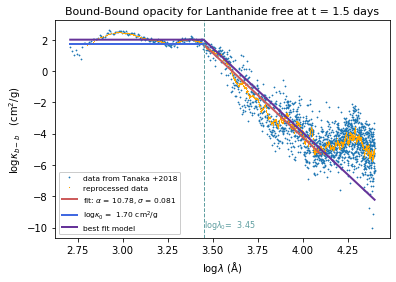

In [20]:
#**********#**********#**********#**********#**********#**********#**********#**********
#**********#**********#**********TIME = 1.5 DAYS #**********#**********#**********#*****
#**********#**********#**********#**********#**********#**********#**********#**********
t0 = 1.5
t = t0

LOG_WaveLength_T1_display, LOG_OPAC_T1_display = lissage(np.log10(WaveLength_reprocessed_LF[:-1]), np.log10(OPAC_LF_brut_T1[:-1]), 10)
LOG_WaveLength_T1_liss, LOG_OPAC_T1_liss = lissage(np.log10(WaveLength_reprocessed_LF[:-1]), np.log10(OPAC_LF_brut_T1[:-1]), 150)
index_ref1 = np.where(LOG_WaveLength_T1_display<=3.45)[0][-1]
index_ref2 = np.where(LOG_WaveLength_T1_display<=4.1)[0][-1]
LOG_WaveLength_T1_fit, LOG_OPAC_T1_fit = LOG_WaveLength_T1_display[index_ref1:index_ref2], LOG_OPAC_T1_display[index_ref1: index_ref2]

log_lambda_0 =  LOG_WaveLength_T1_display[index_ref1]
log_opac_0   =  LOG_OPAC_T1_display[index_ref1]
#WaveLength_binned = WaveLength[::10]
#OPAC_rebinned     = rebin(OPAC_LF_brut,200)

#OPAC_LF_fit       = OPAC_rebinned[index_ref_binned:]#rebin(OPAC_LF_brut[index_ref_binned:], 162)
#WaveLength_fit    = WaveLength_binned[index_ref_binned:]

#LOG_WaveLength_liss_T1, LOG_OPAC_liss_T1 = lissage(np.log10(WaveLength), np.log10(OPAC_LF_brut[-1]), 100)
#index_ref = np.where((LOG_WaveLength_liss_T1)<=3.4)[0][-1]
#print( np.where(WaveLength<=10**(3.2))[0],index_ref)
#index_ref_liss = np.where(LOG_WaveLength_liss<=np.log10(lambda_0)[0][-1])


#popt_1, pcov_1 = curve_fit(fit_function, WaveLength_fit_1,OPAC_LF_fit_1) #p0 = [0, OPAC_LF_brut[index_ref]])#,  method = 'dogbox')#, [np.inf, 10000]))#, method = 'trf')
index_ref = np.where(np.log10(WaveLength_reprocessed_LF)<=3.45)[0][-1]


popt, pcov = curve_fit(fit_function, 10**(LOG_WaveLength_T1_fit),LOG_OPAC_T1_fit, absolute_sigma=True)#, method='lm')#, p0 = [3, OPAC_LF_brut[index_ref]],  method = 'lm')#, [np.inf, 10000]))#, method = 'trf')
chi_2 = 0
for i in range(len(LOG_WaveLength_T1_fit)):
    chi_2+= (LOG_OPAC_T1_fit[i] - fit_function(10**(LOG_WaveLength_T1_fit),*popt)[i])**2/np.abs(fit_function(10**(LOG_WaveLength_T1_fit),*popt)[i])
print(popt, np.diag(pcov), np.sqrt(np.diag(pcov)),chi_2)

#log_opac_0 = fit_function(10**(LOG_WaveLength_T1_fit), *popt)[index]
#popt_brut, pcov_brut = curve_fit(fit_function, WaveLength[:-800],np.log10(OPAC_LF_brut[:-800]))
#chi_2_brut = 0
#for i in range(len(WaveLength[:-800])):
#    chi_2_brut+= (np.log10(OPAC_LF_brut[:-800])[i] - fit_function(WaveLength[:-1],*popt_brut)[i])**2/fit_function(WaveLength[:-800],*popt_brut)[i]
#print(popt_brut, pcov_brut, np.sqrt(pcov_brut),chi_2_brut)
#popt, pcov = curve_fit(fit_function, WaveLength[index_ref:],OPAC_LF_brut[index_ref:])#, bounds=[10.5,14
                                                                                             #, absolute_sigma=True)#, method='dogbox')#, p0 = [3, OPAC_LF_brut[index_ref]],  method = 'lm')#, [np.inf, 10000]))#, method = 'trf')
#chi_2 = 0
#for i in range(len(WaveLength_fit)):
#    chi_2+= (OPAC_LF_fit [i] - fit_function(WaveLength_fit,*popt)[i])**2/fit_function(WaveLength_fit,*popt)[i]
#print(popt, pcov, np.sqrt(pcov),chi_2)
#########################################################################
################################# Plot ############################# 
#########################################################################

log_opac0BestFIT = 2
gammaBestFIT = -0.12
alphaBestFIT = 10.78 * (t/t0)**gammaBestFIT
def model(logwave):
    logopac= []
    for LOGlambda in logwave: 
        if LOGlambda <= log_lambda_0:
            LOGopac = log_opac0BestFIT 
        else:
            LOGopac = log_opac0BestFIT - alphaBestFIT*(LOGlambda - log_lambda_0)
        logopac.append(LOGopac)
    return logopac
#print(model(np.log10(WaveLength_reprocessed[:-1])))
#ax, lw = asManyPlots(111, WaveLength, np.log10((OPAC_LF[0])), plotFlag = True, linewidth= 0.01, linestyle= '-')
fig = plt.figure()
ax  = plt.plot((np.log10(WaveLength_reprocessed_LF[:-1])),(np.log10(OPAC_LF_brut_T1[:-1])), linewidth= 0, marker = '*', markersize=1.2, label = 'data from Tanaka +2018')
ax  = plt.plot((LOG_WaveLength_T1_display),((LOG_OPAC_T1_display)),'orange', linewidth= 0, marker = '*',markersize=0.5, label = 'reprocessed data ')
#ax  = plt.plot((LOG_WaveLength_T1_liss),((LOG_OPAC_T1_liss)),'orange', linewidth= 0, marker = '*',markersize=0.5, label = 'reprocessed data ')


#ax  = plt.plot((LOG_WaveLength_T1_fit),((LOG_OPAC_T1_fit)),  'orange', linewidth= 0, marker = '*', markersize=0.5)



#ax  = plt.plot((WaveLength_binned), (OPAC_rebinned), 'indianred',linewidth= 0, alpha = 0.8, markerSize = 2, marker = '*', 
ax  = plt.plot((LOG_WaveLength_T1_fit),fit_function(10**(LOG_WaveLength_T1_fit), *popt), 'indianred', linewidth = 2, alpha= 1, label= r'fit: $\alpha$ = %5.2f, $\sigma$ = %5.3f' %(popt, np.sqrt(pcov)))
#ax  = plt.plot((np.log10(WaveLength[:-800])),fit_function(WaveLength[:-800], *popt_brut), 'rebeccapurple', linewidth = 2, alpha= 1, label= r'fit: $\alpha$ = %5.2f, $\sigma$ = %5.3f' %(popt_brut, np.sqrt(pcov_brut)))
ax  = plt.plot(np.log10(WaveLength_reprocessed_LF[:index_ref]), [log_opac_0]* (len(np.log10(WaveLength_reprocessed_LF[:index_ref]))), 'royalblue', linewidth = 2,alpha = 1, label = r'$\log\kappa_0$ = %5.2f $\rm{cm^2/g}$' % (log_opac_0))
ax = plt.axvline(x= (LOG_WaveLength_T1_display[index_ref1]), linewidth=1, linestyle= '--', color = 'cadetblue', alpha=3)
#ax  = plt.plot((WaveLength_fit),fit_function(WaveLength_fit, (popt[0] -  np.sqrt(pcov))[0]), 'sandybrown', linewidth = 2, alpha= 1)#, label= r'fit: $\alpha$ = %5.2f, $\sigma$ = %5.3f' %(popt, np.sqrt(pcov)))
ax = plt.plot(np.log10(WaveLength_reprocessed_LF[:-1]), model(np.log10(WaveLength_reprocessed_LF[:-1])), 'rebeccapurple', linewidth = 2, alpha=1, label = 'best fit model')

#plt.xscale('log')
#plt.yscale('log')
#plt.ylim(10**(-5), 10**3)
#plt.xlim(1, 10)
plt.xlabel(r'$\log\lambda$ $\rm{(\AA)}$')
plt.ylabel(r'$\log\kappa_{b-b} \quad (\rm{cm^2/g})}$')
plt.legend( loc= 3, fontsize= 7.5,framealpha = 1), #bbox_to_anchor=(1.2,-0.35), )
plt.title('Bound-Bound opacity for Lanthanide free at t = {:2.1f} days'.format(EPOCH[0]), fontsize=11)
plt.text( 3.45, -10,r'$\log\lambda_0$= %5.2f' %LOG_WaveLength_T1_display[index_ref1], fontsize=8, color='cadetblue', alpha=2)#,bbox=(facecolor='thistle', alpha=0.2, boxstyle='round'))
#plt.savefig("fit_LF_15_4.pdf", bbox_inches='tight')
plt.show()



3.4495169671445773 1.186751225883045
[9.25673651] [[0.00030339]] [[0.01741814]] 87.17153908218316
10.910903895599107


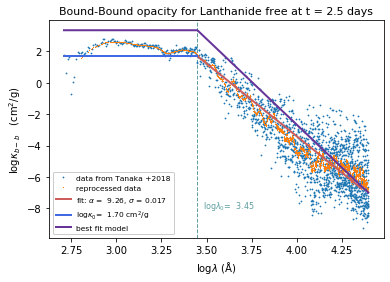

In [30]:
#**********#**********#**********#**********#**********#**********#**********#**********
#**********#**********#**********TIME = 2.5 DAYS #**********#**********#**********#*****
#**********#**********#**********#**********#**********#**********#**********#**********
t0= 1.5
t = 2.5
#OPAC_LF_brut_T2 = OPAC_LF[1]
LOG_WaveLength_T2_display, LOG_OPAC_T2_display = lissage(np.log10(WaveLength_reprocessed[:-1]), np.log10(OPAC_LF_brut_T2[:-1]), 10)
LOG_WaveLength_T2_liss, LOG_OPAC_T2_liss = lissage(np.log10(WaveLength_reprocessed[:-1]), np.log10(OPAC_LF_brut_T2[:-1]), 150)
index_ref25 = np.where(LOG_WaveLength_T2_liss<=3.45)[0][-1]
index_ref = np.where(np.log10(WaveLength_reprocessed)<=3.45)[0][-1]

log_lambda_0_25 =  LOG_WaveLength_T1_liss[index_ref25]
log_opac_0_25   =  LOG_OPAC_T1_liss[index_ref25]
print(log_lambda_0_25, log_opac_0_25)

LOG_WaveLength_T2_fit, LOG_OPAC_T2_fit = LOG_WaveLength_T2_liss[index_ref25:], LOG_OPAC_T2_liss[index_ref25:]
#log_opac_0 = 2

#WaveLength_binned = WaveLength[::20]
#OPAC_rebinned     = rebin(OPAC_LF_brut,100)
#index_ref_binned  = np.where(WaveLength_binned<=lambda_0)[0][-1]

#OPAC_LF_fit    = OPAC_rebinned[index_ref_binned:]
#WaveLength_fit = WaveLength_binned[index_ref_binned:]

popt, pcov = curve_fit(fit_function, 10**(LOG_WaveLength_T2_fit),LOG_OPAC_T2_fit)#, bounds=[7.7,8.5])#, absolute_sigma=True)#, method='dogbox')#, p0 = [3, OPAC_LF_brut[index_ref]],  method = 'lm')#, [np.inf, 10000]))#, method = 'trf')
chi_2 = 0
for i in range(len(LOG_WaveLength_T2_fit)):
    chi_2+= (LOG_OPAC_T2_fit[i] - fit_function(10**(LOG_WaveLength_T2_fit),*popt)[i])**2/np.abs(fit_function(10**(LOG_WaveLength_T2_fit),*popt)[i])
print(popt, pcov, np.sqrt(pcov),chi_2)

alphaBestFIT = 10.8 * (t/t0)**gammaBestFIT
print(alphaBestFIT)
#popt_brut, pcov_brut = curve_fit(fit_function, WaveLength[:-1],np.log10(OPAC_LF_brut[:-1]))
#chi_2_brut = 0
##for i in range(len(WaveLength[:-1])):
 #   chi_2_brut+= (np.log10(OPAC_LF_brut[:-1])[i] - fit_function(WaveLength[:-1],*popt_brut)[i])**2/fit_function(WaveLength[:-1],*popt_brut)[i]
#rint(popt_brut, pcov_brut, np.sqrt(pcov_brut),chi_2_brut)
#popt, pcov = curve_fit(fit_function, WaveLength[index_ref:],OPAC_LF_brut[index_ref:])#, bounds=[9,9.7])#, absolute_sigma=True)#, method='dogbox')#, p0 = [3, OPAC_LF_brut[index_ref]],  method = 'lm')#, [np.inf, 10000]))#, method = 'trf')
#chi_2 = 0
#for i in range(len(WaveLength_fit)):
#    chi_2+= (OPAC_LF_fit [i] - fit_function(WaveLength_fit,*popt)[i])**2/fit_function(WaveLength_fit,*popt)[i]
#rint(popt, pcov, np.sqrt(pcov),chi_2)
#########################################################################
################################# Plot ############################# 
#########################################################################

fig = plt.figure()
#ax  = plt.plot((WaveLength),(OPAC_LF_brut), linewidth= 0.5)
#ax  = plt.plot(WaveLength_binned, OPAC_rebinned, 'slateblue',linewidth= 1, alpha = 0.8, label = 'data from Tanaka +2018')
#ax  = plt.plot((WaveLength_fit),fit_function(WaveLength_fit, *popt), 'indianred', linewidth = 2, alpha= 1, label= r'fit: $\alpha$ = %5.2f, $\sigma$ = %5.3f' %(popt, np.sqrt(pcov)))
#ax  = plt.plot(WaveLength_binned[:index_ref_binned+1], [opac_0]* (len(WaveLength_binned[:index_ref_binned])+1), 'royalblue', linewidth = 2,alpha = 1, label = r'$\kappa$=$\kappa_0$, with $\kappa_0$ = %5.2f $\rm{cm^2/g}$' % (opac_0))
ax  = plt.axvline(x = log_lambda_0 , linewidth=1,  linestyle= '--', color = 'cadetblue', alpha=3)#, opac_rebinned, 'r-',linewidth= 0.5)
ax  = plt.plot((np.log10(WaveLength_reprocessed[:-1])),(np.log10(OPAC_LF_brut_T2[:-1])), linewidth= 0, marker = '*', markersize=1.2, label = 'data from Tanaka +2018')
ax  = plt.plot((LOG_WaveLength_T2_display),(LOG_OPAC_T2_display), linewidth= 0, marker = '*', markersize=0.5, label = 'reprocessed data ')



ax  = plt.plot((LOG_WaveLength_T2_fit),fit_function(10**(LOG_WaveLength_T2_fit), *popt), 'indianred', linewidth = 2, alpha= 1, label= r'fit: $\alpha$ = %5.2f, $\sigma$ = %5.3f' %(popt, np.sqrt(pcov)))
ax  = plt.plot(np.log10(WaveLength_reprocessed[:index_ref]), [log_opac_0]* (len(np.log10(WaveLength_reprocessed[:index_ref]))), 'royalblue', linewidth = 2,alpha = 1, label = r'$\log\kappa_{0}$= %5.2f $\rm{cm^2/g}$' % (log_opac_0))


ax = plt.plot(np.log10(WaveLength_reprocessed[:-1]), model(np.log10(WaveLength_reprocessed[:-1])), 'rebeccapurple', linewidth = 2, alpha=1, label = 'best fit model')




#plt.xscale('log')
#plt.yscale('log')
#plt.ylim(10**(-5), 10**3)
#plt.xlim(500, 30000)
plt.xlabel(r'$\log\lambda$ $\rm{(\AA)}$')
plt.ylabel(r'$\log\kappa_{b-b} \quad (\rm{cm^2/g})}$')
plt.legend( loc= 3, fontsize= 7.5,framealpha = 1), #bbox_to_anchor=(1.2,-0.35), )
plt.title('Bound-Bound opacity for Lanthanide free at t = {:2.1f} days'.format(EPOCH[1]), fontsize=11)
plt.text( 3.48, -8,r'$\log\lambda_0$= %5.2f' %log_lambda_0, fontsize=8, color='cadetblue', alpha=2)#,bbox=(facecolor='thistle', alpha=0.2, boxstyle='round'))
#plt.savefig("fit_LF_25_4.pdf", bbox_inches='tight')
plt.show()

In [50]:
print(len(LOG_WaveLength_T2_display),len(LOG_WaveLength_T2_display),len( LOG_WaveLength_T3_display) )

1930 1930 1930


[10.32443464] [[0.00027307]] [[0.01652494]] 99.95012128100947


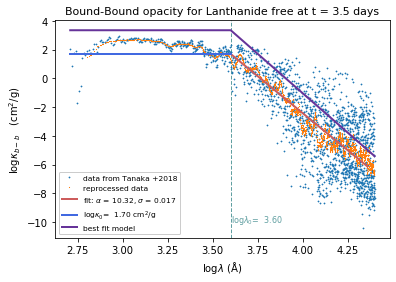

In [31]:
#**********#**********#**********#**********#**********#**********#**********#**********
#**********#**********#********** TIME = 3.5 DAYS #**********#**********#**********#*****
#**********#**********#**********#**********#**********#**********#**********#**********
#index_ref = 350
#lambda_0  =  WaveLength[index_ref]#4.0035000000E+03 
#opac_0    =   OPAC_LF[2][index_ref]#*1.3
#OPAC_LF_brut_T3      = OPAC_LF[2]
t = 3.5 
LOG_WaveLength_T3_display, LOG_OPAC_T3_display = lissage(np.log10(WaveLength_reprocessed[:-1]), np.log10(OPAC_LF_brut_T3[:-1]), 10)
LOG_WaveLength_T3_liss, LOG_OPAC_T3_liss = lissage(np.log10(WaveLength_reprocessed[:-1]), np.log10(OPAC_LF_brut_T3[:-1]), 150)
index_ref35 = np.where(LOG_WaveLength_T3_liss<=3.6)[0][-1]

LOG_WaveLength_T3_fit, LOG_OPAC_T3_fit = LOG_WaveLength_T3_liss[index_ref35:], LOG_OPAC_T3_liss[index_ref35:]


index_ref = np.where(np.log10(WaveLength_reprocessed)<=3.6)[0][-1]

log_lambda_0=  LOG_WaveLength_T3_liss[index_ref35]
#log_opac_0   =  2#LOG_OPAC_T3_liss[index_ref35]
#log_lambda_0 =  LOG_WaveLength_T1_display[index_ref1]
#log_opac_0   =  LOG_OPAC_T1_display[index_ref1]
#WaveLength_binned = WaveLength[::20]
#OPAC_rebinned     = rebin(OPAC_LF_brut,100)
#ndex_ref_binned  = np.where(WaveLength_binned<=lambda_0)[0][-1]

#OPAC_LF_fit    = OPAC_rebinned[index_ref_binned:]
#WaveLength_fit = WaveLength_binned[index_ref_binned:]

#print(np.where(OPAC_LF_brut == 0))

#print(len((OPAC_LF_brut)))


popt, pcov = curve_fit(fit_function, 10**(LOG_WaveLength_T3_fit),LOG_OPAC_T3_fit)#, bounds=[7.7,8.5])#, absolute_sigma=True)#, method='dogbox')#, p0 = [3, OPAC_LF_brut[index_ref]],  method = 'lm')#, [np.inf, 10000]))#, method = 'trf')
chi_2 = 0
for i in range(len(LOG_WaveLength_T3_fit)):
    chi_2+= (LOG_OPAC_T3_fit[i] - fit_function(10**(LOG_WaveLength_T3_fit),*popt)[i])**2/np.abs(fit_function(10**(LOG_WaveLength_T3_fit),*popt)[i])
print(popt, pcov, np.sqrt(pcov),chi_2)

alphaBestFIT = 10.8 * (t/t0)**gammaBestFIT


#popt_brut, pcov_brut = curve_fit(fit_function, WaveLength[:-300],np.log10(OPAC_LF_brut[:-300]))
#chi_2_brut = 0
#for i in range(len(WaveLength[:-300])):
#    chi_2_brut+= (np.log10(OPAC_LF_brut[:-300])[i] - fit_function(WaveLength[:-1],*popt_brut)[i])**2/fit_function(WaveLength[:-300],*popt_brut)[i]
#print(popt_brut, pcov_brut, np.sqrt(pcov_brut),chi_2_brut)

#########################################################################
################################# Plot ############################# 
#########################################################################


fig = plt.figure()
#ax  = plt.plot((WaveLength),(OPAC_LF_brut), linewidth= 0.5, alpha = 0.4)
#ax  = plt.plot(WaveLength_binned, OPAC_rebinned, 'slateblue',linewidth= 1, alpha = 0.8, label = 'data from Tanaka +2018')
#ax  = plt.plot((WaveLength_fit),fit_function(WaveLength_fit, *popt), 'indianred', linewidth = 2, alpha= 1, label= r'fit: $\alpha$ = %5.2f, $\sigma$ = %5.3f' %(popt, np.sqrt(pcov)))
#ax  = plt.plot(WaveLength_binned[:index_ref_binned+1], [opac_0]* (len(WaveLength_binned[:index_ref_binned])+1), 'royalblue', linewidth = 2,alpha = 1, label = r'$\kappa$=$\kappa_0$, with $\kappa_0$ = %5.2f $\rm{cm^2/g}$' % (opac_0))
ax = plt.axvline(x =log_lambda_0, linewidth=1,  linestyle= '--', color = 'cadetblue', alpha=3)#, opac_rebinned, 'r-',linewidth= 0.5)
ax  = plt.plot((np.log10(WaveLength_reprocessed[:-1])),np.log10(OPAC_LF_brut_T3[:-1]), linewidth= 0, marker = '*', markersize=1.2, label = 'data from Tanaka +2018')
ax  = plt.plot((LOG_WaveLength_T3_display),((LOG_OPAC_T3_display)), linewidth= 0, marker = '*', markersize=0.5, label = 'reprocessed data ')


ax  = plt.plot((LOG_WaveLength_T3_fit),fit_function(10**(LOG_WaveLength_T3_fit), *popt), 'indianred', linewidth = 2, alpha= 1, label= r'fit: $\alpha$ = %5.2f, $\sigma$ = %5.3f' %(popt, np.sqrt(pcov)))
#ax  = plt.plot((np.log10(WaveLength[:-300])),fit_function(WaveLength[:-300], *popt_brut), 'rebeccapurple', linewidth = 2, alpha= 1, label= r'fit: $\alpha$ = %5.2f, $\sigma$ = %5.3f' %(popt_brut, np.sqrt(pcov_brut)))
ax  = plt.plot(np.log10(WaveLength_reprocessed)[:index_ref], [log_opac_0]* (len(np.log10(WaveLength_reprocessed)[:index_ref])), 'royalblue', linewidth = 2,alpha = 1, label = r'$\log\kappa_{0}$= %5.2f $\rm{cm^2/g}$' % (log_opac_0))
ax = plt.plot(np.log10(WaveLength_reprocessed[:-1]), model(np.log10(WaveLength_reprocessed[:-1])), 'rebeccapurple', linewidth = 2, alpha=1, label = 'best fit model')






#plt.xscale('log')
#plt.yscale('log')
#plt.ylim(10**(-5), 10**3)
#plt.xlim(500, 30000)
plt.xlabel(r'$\log\lambda$ $\rm{(\AA)}$')
plt.ylabel(r'$\log\kappa_{b-b} \quad (\rm{cm^2/g})}$')
plt.legend( loc= 3, fontsize= 7.5,framealpha = 1), #bbox_to_anchor=(1.2,-0.35), )
plt.title('Bound-Bound opacity for Lanthanide free at t = {:2.1f} days'.format(EPOCH[2]), fontsize=11)
plt.text( 3.6, -10,r'$\log\lambda_0$= %5.2f' %log_lambda_0, fontsize=8, color='cadetblue', alpha=2)#,bbox=(facecolor='thistle', alpha=0.2, boxstyle='round'))
#plt.savefig("fit_LF_3_3.pdf", bbox_inches='tight')
plt.show()

In [14]:
print(index_ref35, index_ref25)

13 13


In [49]:
#**********#**********#**********#**********#**********#**********#**********#**********
#**********#**********#**********TIME = 5.5 DAYS #**********#**********#**********#*****
#**********#**********#**********#**********#**********#**********#**********#**********

index_ref_brut = np.where(np.log10(WaveLength_reprocessed)<=3.6)[0][-1]
LOG_WaveLength_T4_display, LOG_OPAC_T4_display = lissage(np.log10(WaveLength_reprocessed[:-1]), np.log10(OPAC_LF_brut_T4[:-1]), 10)
LOG_WaveLength_T4_liss, LOG_OPAC_T4_liss = lissage(np.log10(WaveLength_reprocessed[:-1]), np.log10(OPAC_LF_brut_T4[:-1]), 150)

index_ref55 = np.where(LOG_WaveLength_T4_liss<=3.6)[0][-1]

LOG_WaveLength_T4_fit, LOG_OPAC_T4_fit = LOG_WaveLength_T4_liss[index_ref55:], LOG_OPAC_T4_liss[index_ref55:]

log_lambda_0 = LOG_WaveLength_T4_liss[index_ref55] #LOG_OPAC_T4_liss[index_ref55]





popt, pcov = curve_fit(fit_function, 10**( LOG_WaveLength_T4_fit),(LOG_OPAC_T4_fit))#, bounds=[7.7,8.5])#, absolute_sigma=True)#, method='dogbox')#, p0 = [3, OPAC_LF_brut[index_ref]],  method = 'lm')#, [np.inf, 10000]))#, method = 'trf')
chi_2 = 0
for i in range(len(LOG_WaveLength_T4_fit)):
    chi_2+= (LOG_OPAC_T4_fit[i] - fit_function(10**(LOG_WaveLength_T4_fit),*popt)[i])**2/np.abs(fit_function(10**(LOG_WaveLength_T4_fit),*popt)[i])
    #chi_2 = chi_2 * len(LOG_WaveLength_T4_fit)/len(LOG_WaveLength_T2_fit)
print(popt, pcov, np.sqrt(pcov),chi_2)

#popt_brut, pcov_brut = curve_fit(fit_function, WaveLength,np.log10(OPAC_LF_brut))
#chi_2_brut = 0
#for i in range(len(WaveLength)):
#    chi_2_brut+= (np.log10(OPAC_LF_brut)[i] - fit_function(WaveLength,*popt_brut)[i])**2/fit_function(WaveLength,*popt_brut)[i]
#print(popt_brut, pcov_brut, np.sqrt(pcov_brut),chi_2_brut)



#########################################################################
################################# Plot ############################# 
#########################################################################

fig = plt.figure()
#ax  = plt.plot((WaveLength),(OPAC_LF_brut), linewidth= 0.5)
#ax  = plt.plot(WaveLength_binned, OPAC_rebinned, 'slateblue',linewidth= 1, alpha = 0.8, label = 'data from Tanaka +2018')
#ax  = plt.plot((WaveLength_fit),fit_function(WaveLength_fit, *popt), 'indianred', linewidth = 2, alpha= 1, label= r'fit: $\alpha$ = %5.2f, $\sigma$ = %5.4f' %(popt, np.sqrt(pcov[0])))
#ax  = plt.plot(WaveLength_binned[:index_ref_binned+1], [opac_0]* (len(WaveLength_binned[:index_ref_binned])+1), 'royalblue', linewidth = 2,alpha = 1, label = r'$\kappa$=$\kappa_0$, with $\kappa_0$ = %5.2f $\rm{cm^2/g}$' % (opac_0))
ax = plt.axvline(x = log_lambda_0, linewidth=1,  linestyle= '--', color = 'cadetblue', alpha=3)#, opac_rebinned, 'r-',linewidth= 0.5)
#ax  = plt.plot((np.log10(WaveLength[:-1])),(np.log10(OPAC_LF_brut[:-1])), linewidth= 0, marker = '*', markersize=1.2)
#ax  = plt.plot((WaveLength_liss),((OPAC_liss)), linewidth= 0, marker = '*', markersize=0.5)

ax  = plt.plot((np.log10(WaveLength_reprocessed)),(np.log10(OPAC_LF_brut_T4)), linewidth= 0, marker = '*', markersize=1.2)
ax  = plt.plot((LOG_WaveLength_T4_display),((LOG_OPAC_T4_display)), linewidth= 0, marker = '*', markersize=0.5)

ax  = plt.plot((LOG_WaveLength_T4_fit),fit_function(10**(LOG_WaveLength_T4_fit), *popt), 'indianred', linewidth = 2, alpha= 1, label= r'fit: $\alpha$ = %5.2f, $\sigma$ = %5.3f' %(popt, np.sqrt(pcov)))
#ax  = plt.plot((np.log10(WaveLength)),fit_function(WaveLength, *popt_brut), 'rebeccapurple', linewidth = 2, alpha= 1, label= r'fit: $\alpha$ = %5.2f, $\sigma$ = %5.3f' %(popt_brut, np.sqrt(pcov_brut)))

ax  = plt.plot(np.log10(WaveLength_reprocessed[:index_ref_brut]), [log_opac_0]* (len(np.log10(WaveLength_reprocessed[:index_ref_brut]))), 'royalblue', linewidth = 2,alpha = 1, label = r'$\log\kappa_0$= %5.2f $\rm{cm^2/g}$' % (log_opac_0))




#plt.xscale('log')
#plt.yscale('log')
#plt.ylim(10**(-5), 2*10**3)
#plt.xlim(500, 30000)
plt.xlabel(r'$\log\lambda$ $\rm{(\AA)}$')
plt.ylabel(r'$\log\kappa_{b-b} \quad (\rm{cm^2/g})}$')
plt.legend( loc= 3, fontsize= 7.5,framealpha = 1), #bbox_to_anchor=(1.2,-0.35), )
plt.title('Bound-Bound opacity for Lanthanide free at t = {:2.1f} days'.format(EPOCH[3]), fontsize=11)
plt.text( 3.55, -11,r'$\log\lambda_0$= %5.2e' %log_lambda_0, fontsize=8, color='cadetblue', alpha=2)#,bbox=(facecolor='thistle', alpha=0.2, boxstyle='round'))
plt.savefig("fit_LF_55d.pdf", bbox_inches='tight')
plt.show()

NameError: name 'OPAC_LF_brut_T4' is not defined

In [39]:
 print((LOG_WaveLength_T1_display[0]))#, OPAC_LF_brut.pop(1899))1.262104421e-09

2.8026027095457597


In [18]:
print(len(LOG_WaveLength_T1_liss), len(LOG_WaveLength_T2_liss), len(LOG_WaveLength_T3_liss), len(LOG_WaveLength_T4_liss))

1650 1650 1650 1650


In [31]:
def rebin( a, newshape ):
        '''Rebin an array to a new shape.
        '''
        assert len(a.shape) == len(newshape)

        slices = [ slice(0,old, float(old)/new) for old,new in zip(a.shape,newshape) ]
        coordinates = np.mgrid[slices]
        print(slices, coordinates)
        indices = coordinates.astype('i')   #choose the biggest smaller integer index
        print(indices)
        return a[tuple(indices)]

In [36]:
print(10**(4.25))

17782.794100389227


[-0.81954903 16.97551705] [[ 0.02237555 -0.27777382]
 [-0.27777382  4.52745477]]


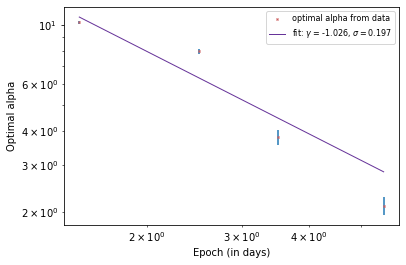

In [13]:
#t_0     = 1.5
#alpha_0 =  9.2
def fit_alpha(t, gamma, const):
    alpha_fit = const*(t)**(gamma)
    return(alpha_fit)

alpha_data = [ 11.88, 9.04, 5.42, 4.05]
alpha_data_not_opt = [11.87793882,9.0432621,3.76987318, 2.0756512]
alpha_data_opt = [ 10.22347492, 7.96579313, 3.79683896, 2.10925768]

GammaOpt_not_opt, GammaCov_not_opt = curve_fit(fit_alpha, EPOCH,alpha_data_not_opt,absolute_sigma=True)
GammaOpt, GammaCov = curve_fit(fit_alpha, EPOCH,alpha_data,absolute_sigma=True)
GammaOpt_opt, GammaCov_opt = curve_fit(fit_alpha, EPOCH,alpha_data_opt,absolute_sigma=True)

#perr = [np.sqrt(0.16503131),np.sqrt(0.04798452), np.sqrt(),np.sqrt() 
perr_not_opt = [np.sqrt(0.16503131),np.sqrt(0.04798452), np.sqrt(0.0372511),np.sqrt(0.0245748)] 
perr_2 = [0.14252769, 0.19083634, 0.24717197,0.15676353]
perr_sup = [10.5,8.5, 5.5, 4.5]
perr_inf = [7.5, 7.5, 2.5, 1.5]
print(GammaOpt, GammaCov)

#ax2 = plt.plot(EPOCH, alpha_data_not_opt, 'indianred', marker = 'x', markersize = 2, linewidth = 0, linestyle= None, label = 'optimal alpha from data' )
#ax2 = plt.plot(EPOCH, fit_alpha(np.array(EPOCH), *GammaOpt_not_opt),'indianred', linewidth=1,
#               label=r'fit: $\gamma$ = %5.3f, $\sigma = %5.3f$' %(GammaOpt_not_opt, np.sqrt(GammaCov_not_opt)))#, np.sqrt(np.diag(GammaCov)[0])))
#ax2 = plt.errorbar(EPOCH, alpha_data_not_opt, yerr = perr_not_opt, fmt = 'none')
#ax2 = plt.plot(EPOCH, alpha_data, 'rebeccapurple', marker = 'x', linewidth = 0, linestyle= None, label = 'optimal alpha from data' )
#ax2 = plt.plot(EPOCH, fit_alpha(np.array(EPOCH), *GammaOpt),'cornflowerblue', linewidth=1,
#               label=r'fit: $\gamma$ = %5.3f, $\sigma = %5.3f$' %(GammaOpt, np.sqrt(GammaCov)))#, np.sqrt(np.diag(GammaCov)[0])))

ax2 = plt.plot(EPOCH, alpha_data_opt, 'indianred', marker = 'x', markersize = 2, linewidth = 0, linestyle= None, label = 'optimal alpha from data' )
ax2 = plt.plot(EPOCH, fit_alpha(np.array(EPOCH), *GammaOpt_opt),'rebeccapurple', linewidth=1, 
               label=r'fit: $\gamma$ = %5.3f, $\sigma = %5.3f$' %(GammaOpt_opt[0], np.sqrt(np.diag(GammaCov_opt)[0])))#, np.sqrt(np.diag(GammaCov)[0])))
ax2 = plt.errorbar(EPOCH, alpha_data_opt, yerr = perr_2, fmt = 'none')
plt.legend(loc=1, fontsize = 8)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Epoch (in days)')
plt.ylabel('Optimal alpha')
plt.savefig("fit_alpha_LF.pdf", bbox_inches='tight')


In [106]:
(GammaOpt_opt)

array([-1.02552515, 16.22663645])

In [26]:
np.log10(10000)

4.0

In [15]:
  
#########################################################################
###################### Retrait des points nuls dans opacité #############
#########################################################################




OPAC_LR_brut_T1 = list(OPAC_LR[0])
OPAC_LR_brut_T2 = list(OPAC_LR[1])
OPAC_LR_brut_T3 = list(OPAC_LR[2])
OPAC_LR_brut_T4 = list(OPAC_LR[3])
WaveLength_reprocessed_LR   = list(WaveLength_brut)
a = np.where(np.array(OPAC_LR_brut_T4) == 0)[0]
print((len(OPAC_LR_brut_T4)), len(a))


while len(a) !=0:
    index = a[0]
    print(index, len(a))
    OPAC_LR_brut_T4.pop(index)
    OPAC_LR_brut_T3.pop(index)
    OPAC_LR_brut_T2.pop(index)
    OPAC_LR_brut_T1.pop(index)
    WaveLength_reprocessed_LR.pop(index)
    a = np.where(np.array(OPAC_LR_brut_T4) == 0)[0]
print(len((OPAC_LR_brut_T4)), len(OPAC_LR_brut_T3), len(OPAC_LR_brut_T2), len(OPAC_LR_brut_T1))

b = np.where(np.array(OPAC_LR_brut_T3) == 0)[0]
print((len(OPAC_LR_brut_T3)), len(b))


while len(b) !=0:
    index = b[0]
    print(index, len(a))
    OPAC_LR_brut_T4.pop(index)
    OPAC_LR_brut_T3.pop(index)
    OPAC_LR_brut_T2.pop(index)
    OPAC_LR_brut_T1.pop(index)
    WaveLength_reprocessed_LR.pop(index)
    a = np.where(np.array(OPAC_LR_brut_T3) == 0)[0]
print(len((OPAC_LR_brut_T3)))


print(np.where(OPAC_LR_brut_T3==0))
              

2000 1
1999 1
1999 1999 1999 1999
1999 0
1999
(array([], dtype=int64),)


In [5]:

 #########################################################################
################################# LISSAGE ############################# 
#########################################################################

def lissage(Lx,Ly, p):
    
    '''Fonction qui débruite une courbe par une moyenne glissante
    sur 2P+1 points'''
    Lxout=[]
    Lyout=[]
    Lxout = Lx[p: -p]
    for index in range(p, len(Ly)-p):
        average = sum(Ly[index-p : index+p+1]) / (2*p + 1)
        Lyout.append(average)
        
    return Lxout,Lyout

################################################################## 
################################# FIT FONCTION ###################
################################################################## 

def fit_function(wave, alpha):
    log_opac_fit = log_opac_0 - alpha * (np.log10(wave) - log_lambda_0)
    #LOG_Opac_Fit =  - alpha * (np.log10(wave) - k2)
    return(log_opac_fit)



[8.8559837] [0.00271425] [0.0520985] 409.92660827205833


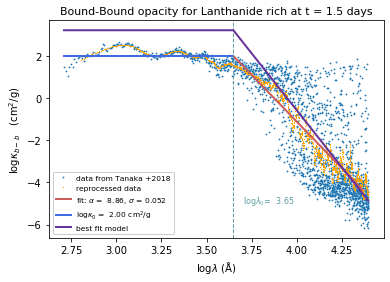

In [6]:
#**********#**********#**********#**********#**********#**********#**********#**********
#**********#**********#**********TIME = 1.5 DAYS #**********#**********#**********#*****
#**********#**********#**********#**********#**********#**********#**********#**********
t0 = 1.5
t = t0
LOG_WaveLength_T1_display, LOG_OPAC_T1_display = lissage(np.log10(WaveLength_reprocessed[:-1]), np.log10(OPAC_LR_brut_T1[:-1]), 10)
LOG_WaveLength_T1_liss, LOG_OPAC_T1_liss = lissage(np.log10(WaveLength_reprocessed[:-1]), np.log10(OPAC_LR_brut_T1[:-1]), 150)
index_ref1 = np.where(LOG_WaveLength_T1_liss<=3.65)[0][-1]
index_ref2 = np.where(LOG_WaveLength_T1_liss<=4.1)[0][-1]
LOG_WaveLength_T1_fit, LOG_OPAC_T1_fit = LOG_WaveLength_T1_liss[index_ref1:], LOG_OPAC_T1_liss[index_ref1:]

log_lambda_0 =  LOG_WaveLength_T1_liss[index_ref1]
log_opac_0   =  2#LOG_OPAC_T1_liss[index_ref1]

index_ref = np.where(np.log10(WaveLength_reprocessed)<=3.65)[0][-1]


popt, pcov = curve_fit(fit_function, 10**(LOG_WaveLength_T1_fit),LOG_OPAC_T1_fit, absolute_sigma=True)#, method='lm')#, p0 = [3, OPAC_LF_brut[index_ref]],  method = 'lm')#, [np.inf, 10000]))#, method = 'trf')
chi_2 = 0
for i in range(len(LOG_WaveLength_T1_fit)):
    chi_2+= (LOG_OPAC_T1_fit[i] - fit_function(10**(LOG_WaveLength_T1_fit),*popt)[i])**2/np.abs(fit_function(10**(LOG_WaveLength_T1_fit),*popt)[i])
print(popt, np.diag(pcov), np.sqrt(np.diag(pcov)),chi_2)

#########################################################################
################################# Plot ############################# 
#########################################################################

log_opac0BestFIT = 3.22
gammaBestFIT = -0.32
alphaBestFIT = 10.8 * (t/t0)**gammaBestFIT
def model(logwave):
    logopac= []
    for LOGlambda in logwave: 
        if LOGlambda <= log_lambda_0:
            LOGopac = log_opac0BestFIT 
        else:
            LOGopac = log_opac0BestFIT - alphaBestFIT*(LOGlambda - log_lambda_0)
        logopac.append(LOGopac)
    return logopac
#ax, lw = asManyPlots(111, WaveLength, np.log10((OPAC_LF[0])), plotFlag = True, linewidth= 0.01, linestyle= '-')
fig = plt.figure()
ax  = plt.plot((np.log10(WaveLength_reprocessed[:-1])),(np.log10(OPAC_LR_brut_T1[:-1])), linewidth= 0, marker = '*', markersize=1.2, label = 'data from Tanaka +2018')
ax  = plt.plot((LOG_WaveLength_T1_display),((LOG_OPAC_T1_display)),'orange', linewidth= 0, marker = '*',markersize=0.5, label = 'reprocessed data ')



ax  = plt.plot((LOG_WaveLength_T1_fit),fit_function(10**(LOG_WaveLength_T1_fit), *popt), 'indianred', linewidth = 2, alpha= 1, label= r'fit: $\alpha$ = %5.2f, $\sigma$ = %5.3f' %(popt, np.sqrt(pcov)))
ax  = plt.plot(np.log10(WaveLength_reprocessed[:index_ref]), [log_opac_0]* (len(np.log10(WaveLength_reprocessed[:index_ref]))), 'royalblue', linewidth = 2,alpha = 1, label = r'$\log\kappa_0$ = %5.2f $\rm{cm^2/g}$' % (log_opac_0))
ax = plt.axvline(x= (LOG_WaveLength_T1_liss[index_ref1]), linewidth=1, linestyle= '--', color = 'cadetblue', alpha=3)

ax = plt.plot(np.log10(WaveLength_reprocessed[:-1]), model(np.log10(WaveLength_reprocessed[:-1])), 'rebeccapurple', linewidth = 2, alpha=1, label = 'best fit model')


plt.xlabel(r'$\log\lambda$ $\rm{(\AA)}$')
plt.ylabel(r'$\log\kappa_{b-b} \quad (\rm{cm^2/g})}$')
plt.legend( loc= 3, fontsize= 7.5,framealpha = 1), #bbox_to_anchor=(1.2,-0.35), )
plt.title('Bound-Bound opacity for Lanthanide rich at t = {:2.1f} days'.format(EPOCH[0]), fontsize=11)
plt.text( 3.7, -5,r'$\log\lambda_0$= %5.2f' %LOG_WaveLength_T1_liss[index_ref1], fontsize=8, color='cadetblue', alpha=2)#,bbox=(facecolor='thistle', alpha=0.2, boxstyle='round'))
#plt.savefig("fit_LR_15_1.pdf", bbox_inches='tight')
plt.show()



[6.07599702] [[2.58538822e-05]] [[0.00508467]] 14.99650554650517


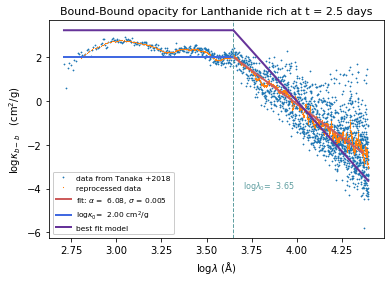

In [7]:
#**********#**********#**********#**********#**********#**********#**********#**********
#**********#**********#**********TIME = 2.5 DAYS #**********#**********#**********#*****
#**********#**********#**********#**********#**********#**********#**********#**********
t = 2.5
LOG_WaveLength_T2_display, LOG_OPAC_T2_display = lissage(np.log10(WaveLength_reprocessed[:-1]), np.log10(OPAC_LR_brut_T2[:-1]), 10)
LOG_WaveLength_T2_liss, LOG_OPAC_T2_liss = lissage(np.log10(WaveLength_reprocessed[:-1]), np.log10(OPAC_LR_brut_T2[:-1]), 150)
index_ref25 = np.where(LOG_WaveLength_T2_liss<=3.65)[0][-1]
index_ref = np.where(np.log10(WaveLength_reprocessed)<=3.65)[0][-1]

#log_lambda_0 =  LOG_WaveLength_T1_liss[index_ref25]
#log_opac_0   = 2# LOG_OPAC_T1_display[index_ref25]
#print(log_lambda_0_25, log_opac_0_25)

LOG_WaveLength_T2_fit, LOG_OPAC_T2_fit = LOG_WaveLength_T2_liss[index_ref25:], LOG_OPAC_T2_liss[index_ref25:]


popt, pcov = curve_fit(fit_function, 10**(LOG_WaveLength_T2_fit),LOG_OPAC_T2_fit)#, bounds=[7.7,8.5])#, absolute_sigma=True)#, method='dogbox')#, p0 = [3, OPAC_LF_brut[index_ref]],  method = 'lm')#, [np.inf, 10000]))#, method = 'trf')
chi_2 = 0
for i in range(len(LOG_WaveLength_T2_fit)):
    chi_2+= (LOG_OPAC_T2_fit[i] - fit_function(10**(LOG_WaveLength_T2_fit),*popt)[i])**2/np.abs(fit_function(10**(LOG_WaveLength_T2_fit),*popt)[i])
print(popt, pcov, np.sqrt(pcov),chi_2)

alphaBestFIT = 10.8 * (t/t0)**gammaBestFIT
#########################################################################
################################# Plot ############################# 
#########################################################################

fig = plt.figure()

ax  = plt.plot((np.log10(WaveLength_reprocessed[:-1])),(np.log10(OPAC_LR_brut_T2[:-1])), linewidth= 0, marker = '*', markersize=1.2, label = 'data from Tanaka +2018')
ax  = plt.plot((LOG_WaveLength_T2_display),(LOG_OPAC_T2_display), linewidth= 0, marker = '*', markersize=0.5, label = 'reprocessed data ')



ax  = plt.plot((LOG_WaveLength_T2_fit),fit_function(10**(LOG_WaveLength_T2_fit), *popt), 'indianred', linewidth = 2, alpha= 1, label= r'fit: $\alpha$ = %5.2f, $\sigma$ = %5.3f' %(popt, np.sqrt(pcov)))
ax  = plt.plot(np.log10(WaveLength_reprocessed[:index_ref]), [log_opac_0]* (len(np.log10(WaveLength_reprocessed[:index_ref]))), 'royalblue', linewidth = 2,alpha = 1, label = r'$\log\kappa_{0}$= %5.2f $\rm{cm^2/g}$' % (log_opac_0))
ax = plt.axvline(x= (LOG_WaveLength_T2_liss[index_ref25]), linewidth=1, linestyle= '--', color = 'cadetblue', alpha=3)
ax = plt.plot(np.log10(WaveLength_reprocessed[:-1]), model(np.log10(WaveLength_reprocessed[:-1])), 'rebeccapurple', linewidth = 2, alpha=1, label = 'best fit model')







#plt.xscale('log')
#plt.yscale('log')
#plt.ylim(10**(-5), 10**3)
#plt.xlim(500, 30000)
plt.xlabel(r'$\log\lambda$ $\rm{(\AA)}$')
plt.ylabel(r'$\log\kappa_{b-b} \quad (\rm{cm^2/g})}$')
plt.legend( loc= 3, fontsize= 7.5,framealpha = 1), #bbox_to_anchor=(1.2,-0.35), )
plt.title('Bound-Bound opacity for Lanthanide rich at t = {:2.1f} days'.format(EPOCH[1]), fontsize=11)
plt.text( 3.7, -4,r'$\log\lambda_0$= %5.2f' %log_lambda_0, fontsize=8, color='cadetblue', alpha=2)#,bbox=(facecolor='thistle', alpha=0.2, boxstyle='round'))
#plt.savefig("fit_LR_25.pdf", bbox_inches='tight')
plt.show()

[3.83497281] [[0.00049934]] [[0.02234588]] 343.2522479390826


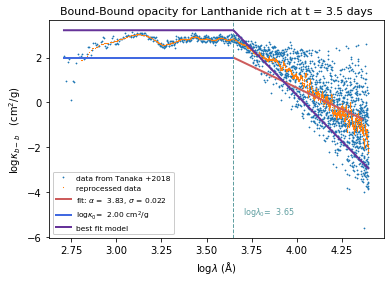

In [8]:
#**********#**********#**********#**********#**********#**********#**********#**********
#**********#**********#********** TIME = 3.5 DAYS #**********#**********#**********#*****
#**********#**********#**********#**********#**********#**********#**********#**********
t = 3.5
LOG_WaveLength_T3_display, LOG_OPAC_T3_display = lissage(np.log10(WaveLength_reprocessed[:-1]), np.log10(OPAC_LR_brut_T3[:-1]), 10)
LOG_WaveLength_T3_liss, LOG_OPAC_T3_liss = lissage(np.log10(WaveLength_reprocessed[:-1]), np.log10(OPAC_LR_brut_T3[:-1]), 150)
index_ref35 = np.where(LOG_WaveLength_T3_liss<=3.65)[0][-1]

LOG_WaveLength_T3_fit, LOG_OPAC_T3_fit = LOG_WaveLength_T3_liss[index_ref35:], LOG_OPAC_T3_liss[index_ref35:]


index_ref = np.where(np.log10(WaveLength_reprocessed)<=3.65)[0][-1]

log_lambda_0 =  LOG_WaveLength_T3_liss[index_ref35], #LOG_OPAC_T3_liss[index_ref35]




popt, pcov = curve_fit(fit_function, 10**(LOG_WaveLength_T3_fit),LOG_OPAC_T3_fit)#, bounds=[7.7,8.5])#, absolute_sigma=True)#, method='dogbox')#, p0 = [3, OPAC_LF_brut[index_ref]],  method = 'lm')#, [np.inf, 10000]))#, method = 'trf')
chi_2 = 0
for i in range(len(LOG_WaveLength_T3_fit)):
    chi_2+= (LOG_OPAC_T3_fit[i] - fit_function(10**(LOG_WaveLength_T3_fit),*popt)[i])**2/np.abs(fit_function(10**(LOG_WaveLength_T3_fit),*popt)[i])
print(popt, pcov, np.sqrt(pcov),chi_2)

alphaBestFIT = 10.8 * (t/t0)**gammaBestFIT


#########################################################################
################################# Plot ############################# 
#########################################################################


fig = plt.figure()

ax  = plt.plot((np.log10(WaveLength_reprocessed[:-1])),np.log10(OPAC_LR_brut_T3[:-1]), linewidth= 0, marker = '*', markersize=1.2, label = 'data from Tanaka +2018')
ax  = plt.plot((LOG_WaveLength_T3_display),((LOG_OPAC_T3_display)), linewidth= 0, marker = '*', markersize=0.5, label = 'reprocessed data ')
ax  = plt.plot((LOG_WaveLength_T3_fit),fit_function(10**(LOG_WaveLength_T3_fit), *popt), 'indianred', linewidth = 2, alpha= 1, label= r'fit: $\alpha$ = %5.2f, $\sigma$ = %5.3f' %(popt, np.sqrt(pcov)))
ax  = plt.plot(np.log10(WaveLength_reprocessed)[:index_ref], [log_opac_0]* (len(np.log10(WaveLength_reprocessed)[:index_ref])), 'royalblue', linewidth = 2,alpha = 1, label = r'$\log\kappa_{0}$= %5.2f $\rm{cm^2/g}$' % (log_opac_0))
ax = plt.axvline(x= (LOG_WaveLength_T3_liss[index_ref35]), linewidth=1, linestyle= '--', color = 'cadetblue', alpha=3)


ax = plt.plot(np.log10(WaveLength_reprocessed[:-1]), model(np.log10(WaveLength_reprocessed[:-1])), 'rebeccapurple', linewidth = 2, alpha=1, label = 'best fit model')






plt.xlabel(r'$\log\lambda$ $\rm{(\AA)}$')
plt.ylabel(r'$\log\kappa_{b-b} \quad (\rm{cm^2/g})}$')
plt.legend( loc= 3, fontsize= 7.5,framealpha = 1), #bbox_to_anchor=(1.2,-0.35), )
plt.title('Bound-Bound opacity for Lanthanide rich at t = {:2.1f} days'.format(EPOCH[2]), fontsize=11)
plt.text( 3.7, -5,r'$\log\lambda_0$= %5.2f' %log_lambda_0, fontsize=8, color='cadetblue', alpha=2)#,bbox=(facecolor='thistle', alpha=0.2, boxstyle='round'))
#plt.savefig("fit_LR_35d.pdf", bbox_inches='tight')
plt.show()

[7.5056604] [[0.00015307]] [[0.01237199]] 583.6717377323098


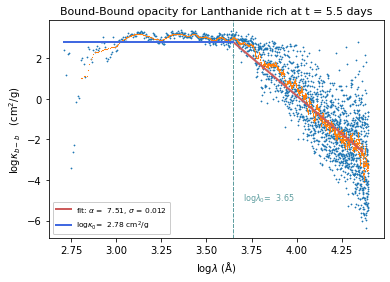

In [20]:
#**********#**********#**********#**********#**********#**********#**********#**********
#**********#**********#**********TIME = 5.5 DAYS #**********#**********#**********#*****
#**********#**********#**********#**********#**********#**********#**********#**********

index_ref_brut = np.where(np.log10(WaveLength_reprocessed)<=3.65)[0][-1]
LOG_WaveLength_T4_display, LOG_OPAC_T4_display = lissage(np.log10(WaveLength_reprocessed[:-1]), np.log10(OPAC_LR_brut_T4[:-1]), 10)
LOG_WaveLength_T4_liss, LOG_OPAC_T4_liss = lissage(np.log10(WaveLength_reprocessed[:-1]), np.log10(OPAC_LR_brut_T4[:-1]), 150)

index_ref55 = np.where(LOG_WaveLength_T4_liss<=3.65)[0][-1]

LOG_WaveLength_T4_fit, LOG_OPAC_T4_fit = LOG_WaveLength_T4_liss[index_ref55:], LOG_OPAC_T4_liss[index_ref55:]

log_lambda_0, log_opac_0 = LOG_WaveLength_T4_liss[index_ref55], LOG_OPAC_T4_liss[index_ref55]





popt, pcov = curve_fit(fit_function, 10**( LOG_WaveLength_T4_fit),(LOG_OPAC_T4_fit))#, bounds=[7.7,8.5])#, absolute_sigma=True)#, method='dogbox')#, p0 = [3, OPAC_LF_brut[index_ref]],  method = 'lm')#, [np.inf, 10000]))#, method = 'trf')
chi_2 = 0
for i in range(len(LOG_WaveLength_T4_fit)):
    chi_2+= (LOG_OPAC_T4_fit[i] - fit_function(10**(LOG_WaveLength_T4_fit),*popt)[i])**2/np.abs(fit_function(10**(LOG_WaveLength_T4_fit),*popt)[i])
    #chi_2 = chi_2 * len(LOG_WaveLength_T4_fit)/len(LOG_WaveLength_T2_fit)
print(popt, pcov, np.sqrt(pcov),chi_2)


#########################################################################
################################# Plot ############################# 
#########################################################################

fig = plt.figure()

ax = plt.axvline(x = log_lambda_0, linewidth=1,  linestyle= '--', color = 'cadetblue', alpha=3)#, opac_rebinned, 'r-',linewidth= 0.5)

ax  = plt.plot((np.log10(WaveLength_reprocessed)),(np.log10(OPAC_LR_brut_T4)), linewidth= 0, marker = '*', markersize=1.2)
ax  = plt.plot((LOG_WaveLength_T4_display),((LOG_OPAC_T4_display)), linewidth= 0, marker = '*', markersize=0.5)

ax  = plt.plot((LOG_WaveLength_T4_fit),fit_function(10**(LOG_WaveLength_T4_fit), *popt), 'indianred', linewidth = 2, alpha= 1, label= r'fit: $\alpha$ = %5.2f, $\sigma$ = %5.3f' %(popt, np.sqrt(pcov)))
ax = plt.axvline(x= (LOG_WaveLength_T4_liss[index_ref55]), linewidth=1, linestyle= '--', color = 'cadetblue', alpha=3)
ax  = plt.plot(np.log10(WaveLength_reprocessed[:index_ref_brut]), [log_opac_0]* (len(np.log10(WaveLength_reprocessed[:index_ref_brut]))), 'royalblue', linewidth = 2,alpha = 1, label = r'$\log\kappa_0$= %5.2f $\rm{cm^2/g}$' % (log_opac_0))

plt.xlabel(r'$\log\lambda$ $\rm{(\AA)}$')
plt.ylabel(r'$\log\kappa_{b-b} \quad (\rm{cm^2/g})}$')
plt.legend( loc= 3, fontsize= 7.5,framealpha = 1), #bbox_to_anchor=(1.2,-0.35), )
plt.title('Bound-Bound opacity for Lanthanide rich at t = {:2.1f} days'.format(EPOCH[3]), fontsize=11)
plt.text( 3.7, -5,r'$\log\lambda_0$= %5.2f' %log_lambda_0, fontsize=8, color='cadetblue', alpha=2)#,bbox=(facecolor='thistle', alpha=0.2, boxstyle='round'))
plt.savefig("fit_LR_55.pdf", bbox_inches='tight')
plt.show()